5
Akou pousti, ta peaks einai ta parakato
[0.0144 0.318  0.5404 0.715  0.8226]


(-0.1, 1.0)

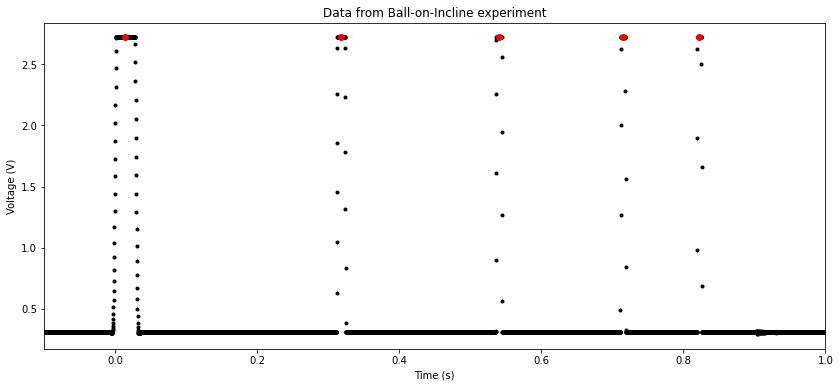

In [5]:
import scipy as sp
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from iminuit import Minuit


def read_csv(filename):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=15, names=True)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    voltage2 = dat['Channel_2_V']
    return time, voltage

filename = "Eirini_1.csv"  #filename

time, voltage= read_csv(filename)

# fig, ax = plt.subplots(figsize=(14, 6))
# ax.plot(time, voltage, 'k.', label='Measurements')
# ax.set_title("Data from Ball-on-Incline experiment")
# ax.set_xlabel("Time (s)")
# ax.set_ylabel("Voltage (V)")
# ax.set_xlim(-0.55, 1)



#----- peaks----- 
peaks,_ = find_peaks(voltage,2)
print(len(peaks))      

print('Akou pousti, ta peaks einai ta parakato')
print(time[peaks[:]])
    
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(time, voltage, 'k.', label='Measurements')
ax.plot(time[peaks[:]],voltage[peaks[:]],'or')
ax.set_title("Data from Ball-on-Incline experiment")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.set_xlim(-0.1, 1)



In [12]:
x=np.array([140.8,124.1,101.2,78.8,60.8])
x=x-x[4]
x=np.flip(x)
print(x)
#x[:,:]-=x[:,:]-x[:,4]
#x=x[:,:]
#print(x)
#xrev=np.flip(x,0)
#xrev=xrxrev[:,:-1]
#print("\n",xrev)
"""
sfoto_rev=np.flip(xrev)
print(sfoto)

sfoto1=np.array([xrev[-1]-i for i in xrev])
print(sfoto1)
sfoto=sfoto1[:-1]
print(sfoto)
124.1-101.2
"""


[ 0.  18.  40.4 63.3 80. ]


'\nsfoto_rev=np.flip(xrev)\nprint(sfoto)\n\nsfoto1=np.array([xrev[-1]-i for i in xrev])\nprint(sfoto1)\nsfoto=sfoto1[:-1]\nprint(sfoto)\n124.1-101.2\n'

In [13]:
time_rev=np.flip(time[peaks[:]])
print(time[peaks[:]])

[0.0144 0.318  0.5404 0.715  0.8226]


[78.63076953 33.10697807 -0.48733878]


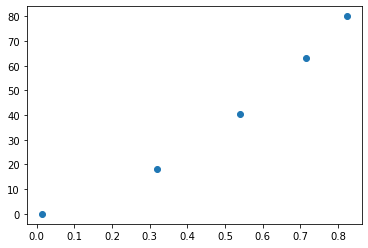

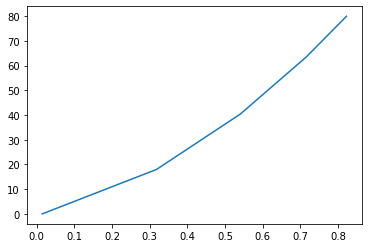

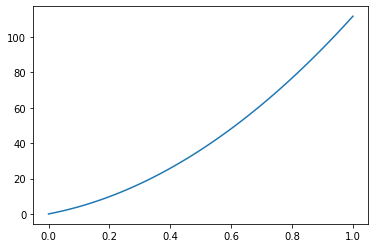

In [14]:
import scipy.optimize
def parabola(t, a, b, c):
     return a*t**2 + b*t + c

t = np.linspace(0, 1, 100)
fit_params, pcov = scipy.optimize.curve_fit(parabola, time[peaks[:]],x)
print(fit_params)
y_fit = parabola(time[peaks[:]], *fit_params)
plt.scatter(time[peaks[:]], x, label='fit')
plt.show()
plt.plot(time[peaks[:]],y_fit)
plt.show()
yu=78.63*t**2+33.10*t
plt.plot(t,yu)
plt.show()


In [15]:
(1+2*(13.10**2/(13.10**2-6.13**2))/5) * 2*0.7863/0.2608


9.118078010082053

In [17]:
x=np.array([[140.8,124.1,101.2,78.8,60.8],[140.8,124.4,101.8,79.2,61.15],[141.3,124.85,101.95,79.6,61.6],[141.3,124.85,101.95,79.64,61.55]])

for i in range(len(x)):
    x[i,:]-=x[i,4]
    
x=np.flip(x)
print(x)


[[ 0.   18.09 40.4  63.3  79.75]
 [ 0.   18.   40.35 63.25 79.7 ]
 [ 0.   18.05 40.65 63.25 79.65]
 [ 0.   18.   40.4  63.3  80.  ]]


In [37]:
import scipy as sp
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from iminuit import Minuit



# data = pd.read_csv(
#     filename,      # relative python path to subdirectory
#     sep='\'           # Tab-separated value file.
#     quotechar="'",        # single quote allowed as quote character
#     usecols=['name', 'birth_date', 'salary'].   # Only load the three columns specified.
#     skiprows=15,         # Skip the first 10 rows of the file
#     na_values=['.', '??']       # Take any '.' or '??' values as NA
# )

def read_csv(filename):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=15, names=True)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    voltage2 = dat['Channel_2_V']
    return time, voltage

ep = ["Eirini_1.csv","Filippos_1.csv","Miguel_1.csv","Nikos_1.csv","Eirini_2.csv","Filippos_2.csv","Miguel_2.csv","Nikos_2.csv"]


time=np.zeros((25000,8))
voltage=np.zeros((25000,8))
peaks1=np.zeros((5,8),int)
times=np.zeros((5,8),int)

for i, pos in enumerate(ep):
    time[:,i], voltage[:,i]= read_csv(pos)
    peaks,_ = find_peaks(voltage[:,i],2)
    peaks1[:,i]=peaks
times[:,:]=time[peaks1[:,:]]                            #Εδω θέλω να φορτωνει τις χρονικες στιγμές που εμφανιζπνται αυτα τα πικς 
print(peaks1)
print(times)
  

print('Akou pousti, ta peaks einai ta parakato')
print(time[peaks[:]])
    
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(time, voltage, 'k.', label='Measurements')
ax.plot(time[peaks[:]],voltage[peaks[:]],'or')
ax.set_title("Data from Ball-on-Incline experiment")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.set_xlim(-0.1, 1)



ValueError: could not broadcast input array from shape (5,8,8) into shape (5,8)